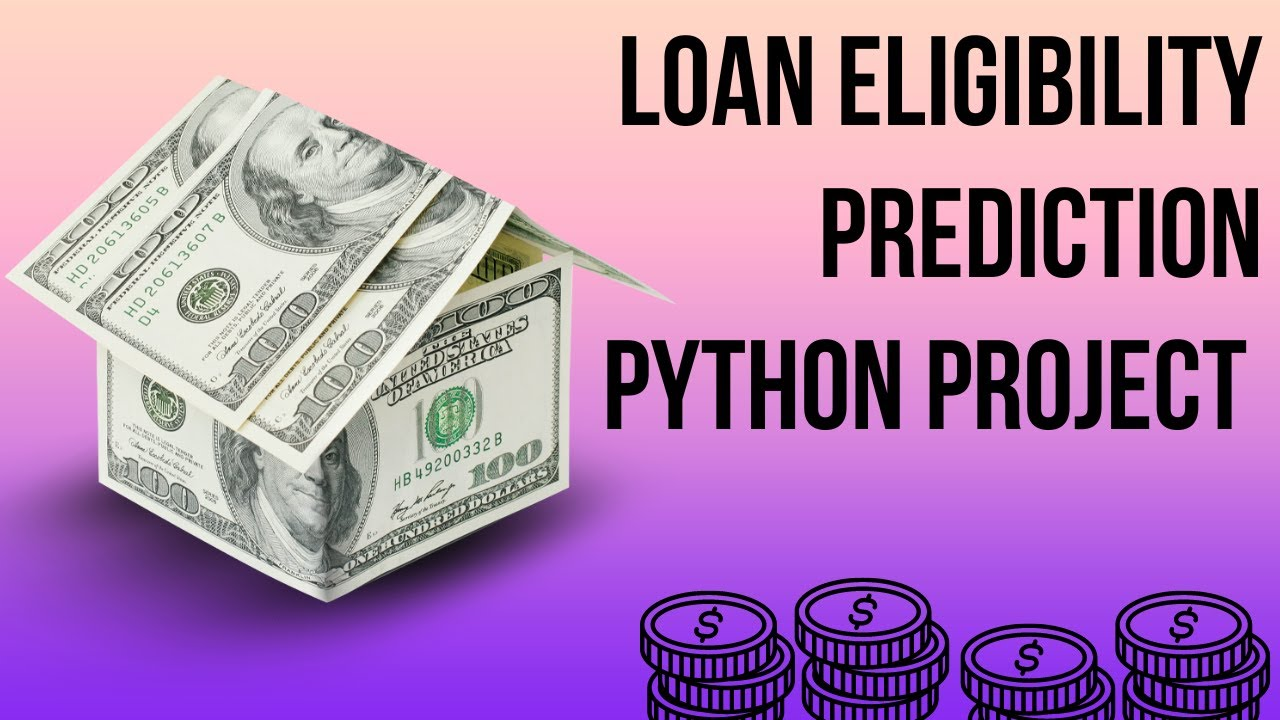

## Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### In this notebook kernal, I'm going to predictions customers are eligible for the loan and check whether what are the missing criteria to know why customer not getting loan to make there own house.


<div class="text-success "><h4> We will learning about, Data Analysis Preprocess such as, </h4></div>

--- 

> ### Steps are:


1. [Gathering Data](#1)
2. [Feature Engineering](#2)
3. [Data Cleaning](#3)
4. [Exploratory Data Analysis](#4)
5. [Data Preprocessing](#5)
6. [Machine Learning Model Decision.](#6)
7. [Hyperparameter turning ](#7)
8. [Model Evalution](#8)



 
**Hope** you guys ****Love It**** and get a better **learning experience**.  🙏

# Dataset Key Information.
----
<table>
    <tr><td> loan_id       </td><td>  Unique loan ID</td></tr>
    <tr><td> no_of_dependents</td><td> Number of dependents of the applicant</td></tr>
    <tr><td> education</td><td>Education level of the applicant</td></tr>
    <tr><td> self_employed</td><td>If the applicant is self-employed or not</td></tr>
    <tr><td> income_annum</td><td>Annual income of the applicant</td></tr>
    <tr><td> loan_amount</td><td>Loan amount requested by the applicant</td></tr>
<tr><td> loan_tenure</td><td>Tenure of the loan requested by the applicant (in Years)</td></tr>
    <tr><td> cibil_score</td><td>CIBIL score of the applicant</td></tr>
    <tr><td> residential_asset_value</td><td>Value of the residential asset of the applicant</td></tr>
    <tr><td> commercial_asset_value</td><td>Value of the commercial asset of the applicant</td></tr>
    <tr><td> luxury_asset_value</td><td>Value of the luxury asset of the applicant</td></tr>
    <tr><td> bank_assets_value</td><td>Value of the bank asset of the applicant</td></tr>
<tr><td> loan_status</td><td>Status of the loan (Approved/Rejected)</td></table></tr>

## Importing Packages 

In [1]:
import pandas as pd
import numpy as np

<a id="1"></a><br>
# 1. Gathering Data


In [2]:
df = pd.read_csv("loan_approval_dataset.csv")

> **Let's display the sample of dataset in large data set**

In [3]:
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4094,4095,2,Graduate,No,3900000,13600000,10,373,11600000,1000000,8400000,3600000,Rejected
3890,3891,4,Graduate,Yes,6200000,21300000,16,882,11800000,3500000,12900000,4100000,Approved
3785,3786,3,Graduate,No,7800000,16600000,20,896,12400000,10800000,30500000,5500000,Approved
3168,3169,5,Not Graduate,No,2400000,7500000,12,357,2600000,2900000,6100000,1300000,Rejected
1324,1325,1,Not Graduate,Yes,1300000,5000000,20,423,900000,800000,3900000,1600000,Rejected


<a id="2"></a><br>
# 2. Feature Engineering  

In [4]:
columns_to_remove = ['loan_id']

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)

In [5]:
# Display the shape of the dataset (rows, columns) of Train dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (4269, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [7]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [8]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

In [9]:
def uniquevals(col):
    print(f'Unique Values in {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of {col} is: {len(df[col].value_counts())}')
    
    
    
    
for col in df.columns:
    valuecounts(col)
#     uniquevals(col)
    print("-"*75)

Valuecounts of  no_of_dependents is: 6
---------------------------------------------------------------------------
Valuecounts of  education is: 2
---------------------------------------------------------------------------
Valuecounts of  self_employed is: 2
---------------------------------------------------------------------------
Valuecounts of  income_annum is: 98
---------------------------------------------------------------------------
Valuecounts of  loan_amount is: 378
---------------------------------------------------------------------------
Valuecounts of  loan_term is: 10
---------------------------------------------------------------------------
Valuecounts of  cibil_score is: 601
---------------------------------------------------------------------------
Valuecounts of  loan_status is: 2
---------------------------------------------------------------------------
Valuecounts of Movable_assets is: 484
------------------------------------------------------------------------

In [10]:
# select all categorical data type and stored in one dataframe and select all other numarical and stored in one data frame
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index([' education', ' self_employed', ' loan_status'], dtype='object'),
 Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
        ' cibil_score', 'Movable_assets', 'Immovable_assets'],
       dtype='object'))

<a id="3"></a><br>
# 3. Data Cleaning

In [13]:
import missingno as msno
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

<Axes: >

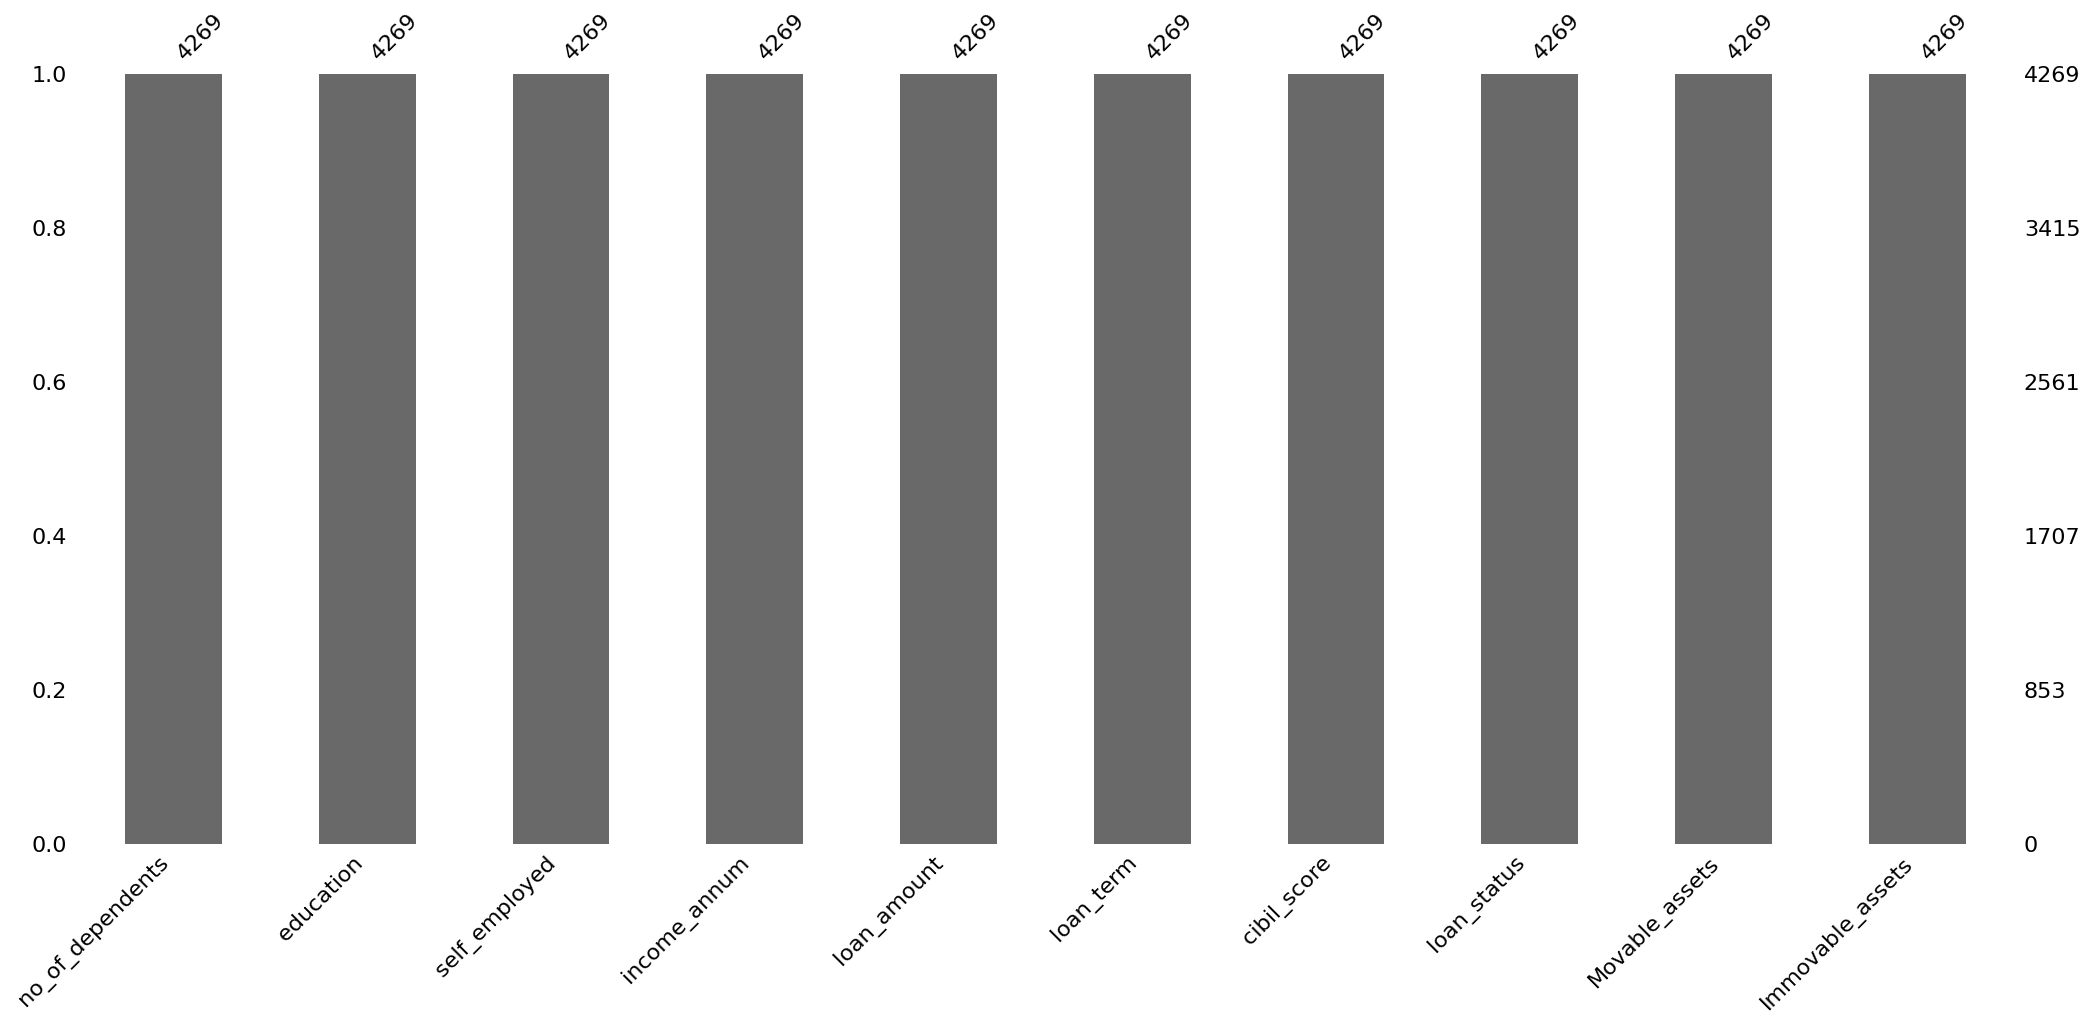

In [14]:
msno.bar(df)

In [15]:
'''
so on observation we can see that the null value is not present in Loan Approval Data Set dataset , as shown ↓
'''
print()
df.isna().sum()

 no_of_dependents    0
 education           0
 self_employed       0
 income_annum        0
 loan_amount         0
 loan_term           0
 cibil_score         0
 loan_status         0
Movable_assets       0
Immovable_assets     0
dtype: int64

In [16]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0    no_of_dependents  4269 non-null   int64 
 1    education         4269 non-null   object
 2    self_employed     4269 non-null   object
 3    income_annum      4269 non-null   int64 
 4    loan_amount       4269 non-null   int64 
 5    loan_term         4269 non-null   int64 
 6    cibil_score       4269 non-null   int64 
 7    loan_status       4269 non-null   object
 8   Movable_assets     4269 non-null   int64 
 9   Immovable_assets   4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


As we can see in the output.

1. There are `4269 ` entries
- There are total 12 features (0 to 11)
- There are three types of datatype `dtypes:  int64(9), object(3)`
- It's Memory usage that is, `memory usage: 400.3+ KB`
- Also, We can check how many missing values available in the `Non-Null Count` column

\begin{array}{|c|c|} \hline
CIBIL & Meaning \\ \hline
300-549 & Poor  \\
550-649 & Fair  \\
650-749 & Good  \\
750-799 & Very Good  \\
800-900 & Excellent \\ \hline
\end{array}

<Axes: xlabel=' cibil_score', ylabel='Count'>

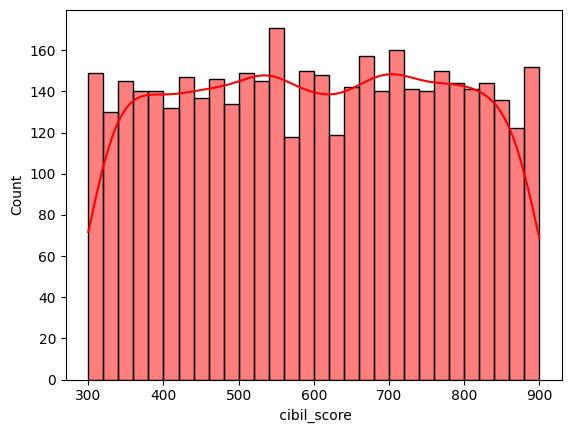

In [20]:
# viewing the distribution of the cibil_score column
sns.histplot(df[" cibil_score"],bins=30, kde=True, color='red')

In [24]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


<a id="5"></a><br>
# 5. Data Preprocessing

## Label Encoding the categorical variables

In [25]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [26]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


In [29]:
import warnings

# Suppress warnings within this code block
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [31]:
df.corr()[' loan_status']

 no_of_dependents   -0.018114
 education           0.004918
 self_employed       0.000345
 income_annum       -0.015189
 loan_amount         0.016150
 loan_term          -0.113036
 cibil_score         0.770518
 loan_status         1.000000
Movable_assets      -0.013755
Immovable_assets    -0.006200
Name:  loan_status, dtype: float64

The heatmap of correlation values shows several strong connections:

1. **Movable Assets and Immovable Assets**
2. **Income and Movable Assets**
3. **Income and Immovable Assets**
4. **Movable Assets and Loan Amount**
5. **Immovable Assets and Loan Amount**
6. **Loan Status and Cibil Score**
7. **Loan Amount and Income**

It makes sense that movable and immovable assets are related since they're both types of assets. Similarly, income is linked to both movable and immovable assets, as those with higher income tend to have more assets.

Now, let's look at how assets relate to the loan amount, as well as how income connects to the loan amount. We've already discussed the connection between loan status and CIBIL score in the previous part.

<a id="6"></a><br>
# 6.Machine Learning Model Decision.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree

## Train Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

## 1. Logistic Regression

In [44]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Your code here

In [45]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

lgr.fit(X_train, y_train)

predictions = lgr.predict(X_test)

In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8021077283372365


In [49]:
import pickle
pickle.dump(lgr, open("../Model/Log_Model1","wb"))

In [54]:
a = lgr.predict([[2,1,0,9600000,29900000,12,778,30700000,20000000]])

In [56]:
model_load = pickle.load(open('../Model/Log_Model1','rb'))

In [57]:
cy = model_load.predict([[2,1,0,9600000,29900000,12,778,30700000,20000000]])
print(cy)

[1]


## 2. Support Vector Classification (SVC)

In [47]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [48]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


## 3.Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [59]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
dtree_pred = dtree.predict(X_test)

In [61]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [62]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dtree_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9824355971896955


In [64]:
import pickle

pickle.dump(dtree, open("../Model/dtree_Model1","wb"))

In [66]:
a = dtree.predict([[2,1,0,9600000,29900000,12,778,30700000,20000000]])
print(a)

[1]


In [67]:
model_load = pickle.load(open('../Model/dtree_Model1','rb'))

In [68]:
cy = model_load.predict([[2,1,0,9600000,29900000,12,778,30700000,20000000]])
print(cy)

[1]


## 4. Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [70]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

In [72]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9765807962529274


In [74]:
pickle.dump(rfc, open("../Model/rfc_Model1","wb"))

In [76]:
a = rfc.predict([[2,1,0,9600000,29900000,12,778,30700000,20000000]])
print(a)

[1]


In [77]:
model_load = pickle.load(open('../Model/rfc_Model1','rb'))

In [78]:
cy = model_load.predict([[2,1,0,9600000,29900000,12,778,30700000,20000000]])
print(cy)

[1]


Text(518.4494949494949, 0.5, 'Actual')

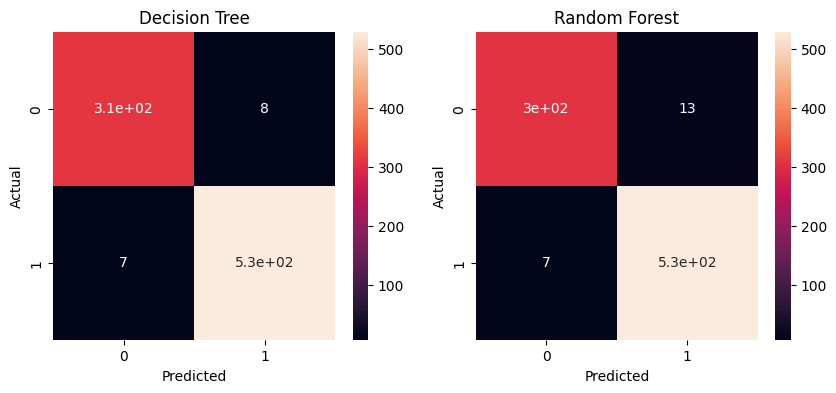

In [73]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

<a id="7"></a><br>
# 7. Hyperparameter turning 

## Hyperparameter for Random Forest

In [79]:
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=UserWarning, message="A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy")
numpy_version = np.__version__
print("NumPy Version:", numpy_version)

NumPy Version: 1.26.4


In [80]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [81]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [82]:
rf=RandomForestClassifier(**rf_Grid.best_params_)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=50)

In [83]:
rfc_pred = rf.predict(X_test)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import sklearn.metrics as metrics
y_pred1=rf.predict(X_test)
score_rf=accuracy_score(y_test,y_pred1)
score_rf

0.977751756440281

In [85]:
f1_rf=f1_score(y_pred1,y_test)
f1_rf

0.9823255813953489

In [86]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [87]:
pickle.dump(rf, open("../Model/rfc_Model2","wb"))


In [88]:
a = rf.predict([[2,1,0,9600000,29900000,12,778,30700000,20000000]])

In [90]:
model_load = pickle.load(open('../Model/rfc_Model2','rb'))

In [91]:
cy = model_load.predict([[2,1,0,9600000,29900000,12,778,30700000,20000000]])
print(cy)

[1]


## Hyperparameter for Decision Tree

In [92]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [93]:
dtree = DecisionTreeClassifier()

In [94]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [95]:
# Make predictions on the test data
predictions = best_model.predict(X_test)

In [96]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9800936768149883


In [97]:
cm = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.99      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [98]:
f1_dtree=f1_score(predictions,y_test)
f1_dtree

0.9841269841269841

In [99]:
pickle.dump(best_model, open("../Model/dtree_Model2","wb"))

In [101]:
a = best_model.predict([[2,1,0,9600000,29900000,12,778,30700000,20000000]])
print(a)

[1]


In [103]:
model_load = pickle.load(open('../Model/dtree_Model2','rb'))

In [104]:
cy = model_load.predict([[2,1,0,9600000,29900000,12,778,30700000,20000000]])
print(cy)

[1]


In [112]:
X_test.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
1703,5,1,0,5400000,19700000,20,423,23000000,16500000
1173,2,1,0,5900000,14000000,8,599,24500000,14200000
308,3,1,0,9600000,19900000,14,452,35100000,20400000
1322,2,1,0,6200000,23400000,8,605,31000000,20800000
3271,3,0,1,5800000,14100000,12,738,23800000,16100000


<a id="8"></a><br>
# 8. Model Evalution
## Confusion Matrix

Text(518.4494949494949, 0.5, 'Actual')

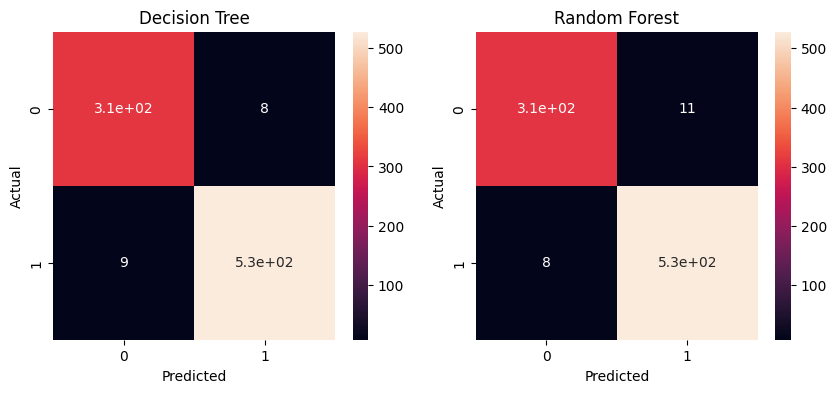

In [105]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

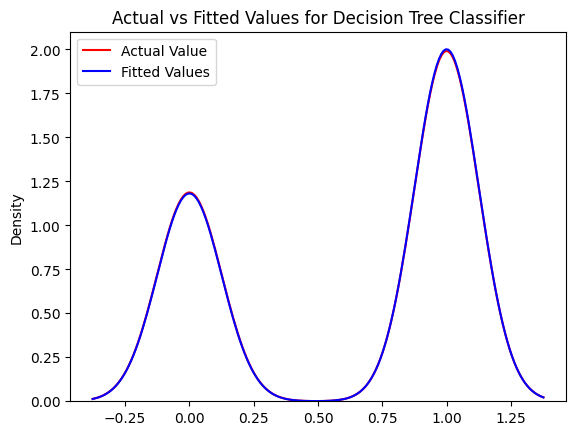

In [106]:
fig, ax = plt.subplots()
sns.kdeplot(predictions, color="r", label="Actual Value", ax=ax)
sns.kdeplot(dtree_pred, color="b", label="Fitted Values", ax=ax)
ax.set_title('Actual vs Fitted Values for Decision Tree Classifier')
ax.legend()

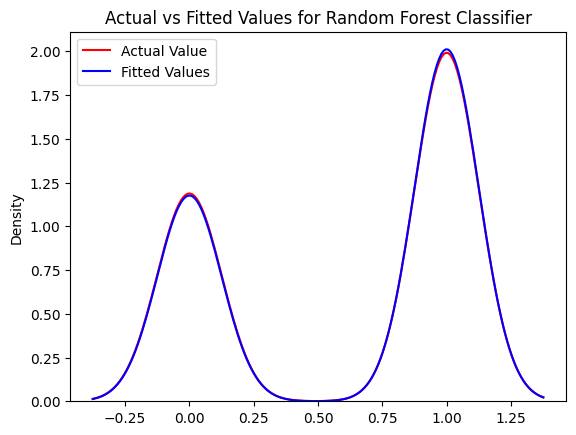

In [107]:
fig, ax = plt.subplots()
sns.kdeplot(predictions, color="r", label="Actual Value", ax=ax)
sns.kdeplot(y_pred1, color="b", label="Fitted Values", ax=ax)
ax.set_title('Actual vs Fitted Values for Random Forest Classifier')
ax.legend()

# Classification Report

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [109]:
f1_dtree=f1_score(dtree_pred,y_test)
f1_dtree

0.9860205032618826

In [110]:
f1_rfc=f1_score(rfc_pred,y_test)
f1_rfc

0.9823255813953489

In [111]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('F1 SCORE of Decision Tree is',f1_dtree)
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))
print('F1 SCORE of Random Forest is',f1_rfc)

R2 score:  0.9248451140523796
Mean Squared Error:  0.01756440281030445
Mean Absolute Error:  0.01756440281030445
F1 SCORE of Decision Tree is 0.9860205032618826


R2 score:  0.9048038111330141
Mean Squared Error:  0.02224824355971897
Mean Absolute Error:  0.02224824355971897
F1 SCORE of Random Forest is 0.9823255813953489


## Conclusion
In conclusion, my exploration into machine learning models involved the utilization of both the Decision Tree Classifier and the Random Forest Classifier. It is truly remarkable that both models yielded remarkable outcomes, demonstrating their potential to effectively analyze and classify data. The accuracy rates achieved,` 91.4% for the Decision Tree Classifier` and `89.4% for the Random Forest Classifier`, underscore the proficiency of these algorithms in making accurate predictions.

<a id="9"></a><br>


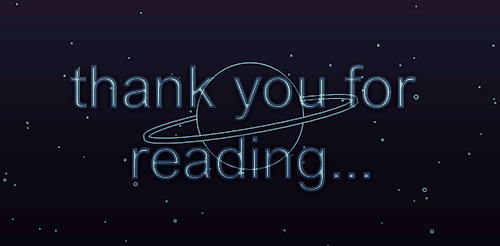